In [1]:
import pandas as pd
from sklearn.linear_model import RANSACRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
# import seaborn as sns

In [3]:
def read_split_data(data, x_columns, y_column, test_size, rs):
    dataset = pd.read_csv(data)
    X = dataset[x_columns]
    y = dataset[[y_column]]
    return train_test_split(X, y, test_size=test_size, random_state=rs)

In [4]:
input_cols = ["gdp", "family", "lifexp", "freedom", "generosity", "corruption", "dystopia"]
target = "score"
X_train, X_test, y_train, y_test = read_split_data(data="../inputs/felicidad_corrupt.csv",
                                                    x_columns=input_cols, y_column=target, test_size=0.3, rs=42)

estimadores = {
    'SVR': SVR(gamma='auto', C=1.0, epsilon=0.1),
    'RANSAC': RANSACRegressor(),  # Meta estimador
    'HUBER': HuberRegressor(epsilon=1.35,)
}

SVR MSE:  0.0067738484
Score 0.9969540491531258


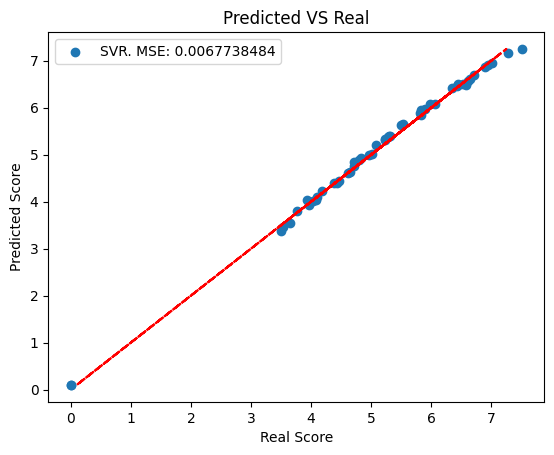

RANSAC MSE:  9.41e-08
Score 0.9999999576862787


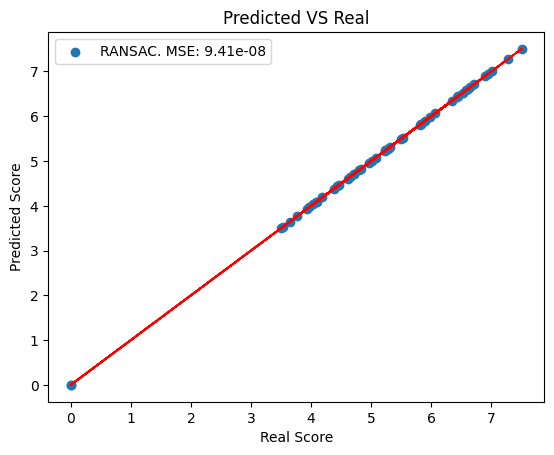

HUBER MSE:  1.036e-07
Score 0.9999999534040022


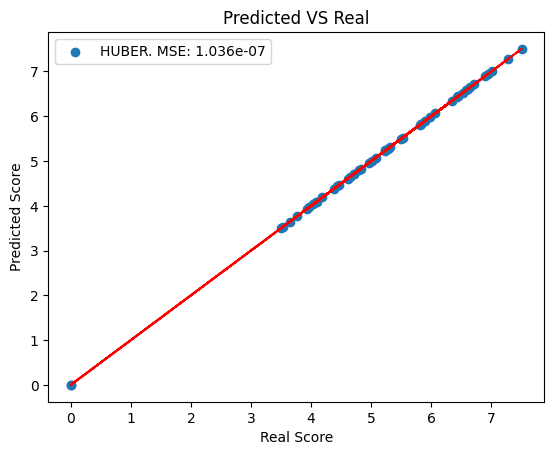

In [7]:
plt.ylabel('Predicted Score')
plt.xlabel('Real Score')
plt.title(f'Predicted VS Real')
for name, estimador in estimadores.items():
    # Entrenamos
    estimador.fit(X_train, y_train)
    # Predecimos
    predictions = estimador.predict(X_test)
    # Medimos
    mse = mean_squared_error(y_test, predictions)
    print(f'{name} MSE: ', round(mse, 10))
    print("Score", estimador.score(X_test, y_test))
    print('=' * 64)
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, predictions, label=f'{name}. MSE: {round(mse, 10)}')
    plt.plot(predictions, predictions, "r--")
    plt.legend()
    plt.savefig("regresion_results.png")
    plt.show()

plt.close()